### Import libraries

In [1]:
import os
import sys
sys.path.append("..")
from model import experimental_model, experimental2d_model, grapher
from data import batch_creator, loader
from helpers import helpers, plotter, metrics
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D')
kernel = input()
print('How many observations? (deafult 150000)')
dataset_size = input()
print('Do you want to overwrite data? True/False')
rewrite = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = os.path.expanduser('~/Downloads/GPT_' + kernel)

Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D
rbf_const_2D
How many observations? (deafult 150000)
2
Do you want to overwrite data? True/False
False


In [3]:
data = loader.load_data(kernel, size = dataset_size, rewrite = rewrite.capitalize(), diff_x= True, noise = False, d = d, ordered = True)

['em_te_2.npy', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy', 'em_tr_2.npy']


In [4]:
a = data[-4][1, :10].reshape(1, -1)

In [5]:
b = data[1][1, :10].reshape(1, -1)

In [6]:
c = data[-3][1, :10].reshape(1, -1)

In [7]:
dd = data[-1][1, :10].reshape(1, -1)

In [8]:
a

array([[264., 244., 340., 289., 314., 265., 254., 249., 285., 242.]])

In [9]:
b

array([[ 7.30813801,  5.38459099, 14.91017682,  9.8774689 , 12.35579582,
         7.4977443 ,  6.36305617,  5.85732549,  9.41111518,  5.15314729]])

In [10]:
c

array([[ 1.42948886,  3.97891532,  3.30185699, -0.46714584, -2.88594971,
        -3.64957459,  3.47368   , -0.58534392, -1.17222729, -0.57185026]])

In [11]:
dd

array([[0., 0., 0., 1., 1., 1., 0., 1., 1., 1.]])

In [12]:
batch_creator.create_batch_2d(a, b, c, dd, batch_s=1, context_p=2)

p:  0.49641991817168185


([array([[-0.57185026,  3.97891532, -0.58534392,  3.47368   , -3.64957459,
          -1.17222729, -0.46714584, -2.88594971,  1.42948886,  3.30185699]]),
  array([[ 5.15314729,  5.38459099,  5.85732549,  6.36305617,  7.4977443 ,
           9.41111518,  9.8774689 , 12.35579582,  7.30813801, 14.91017682]]),
  array([[242., 244., 249., 254., 265., 285., 289., 314., 264., 340.]]),
  array([[1., 0., 1., 0., 1., 1., 1., 1., 0., 0.]])],
 [8])

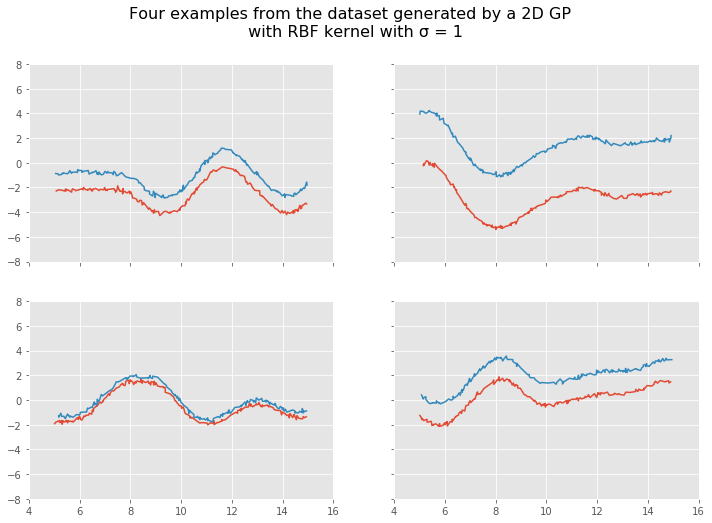

In [13]:
if d:
    plotter.plot_2d_examples(data[2], data[-2], data[0])
else:
    plotter.plot_examples(data[0], data[4])

In [14]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [15]:
# batch_x_tr, batch_tar_tr, _ = batch_creator.fake_batch(pad_x_tr, pad_y_fren_tr, batch_s=1)

New folder /Users/omernivron/Downloads/GPT_rbf_const_2D/ckpt/check_run_9999
Initializing from scratch.


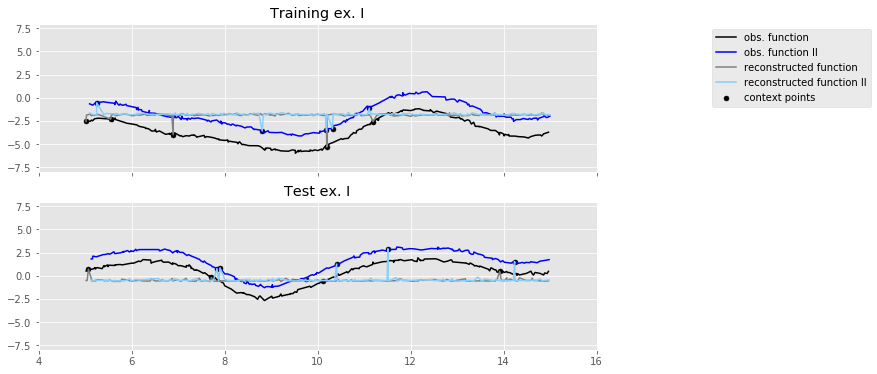

Epoch 0 batch 0 train Loss 44.7379 test Loss 5.0772 with training MSE metric 5.3902 and testing MSE metric 5.3443
learning rate is 0.0003000000142492354
r squared training, series 0: -3.618083534339213, series 1: -2.881498357431896
r squared testing, series 0: -3.8282916510791045, series 1: -1.6793401669275176


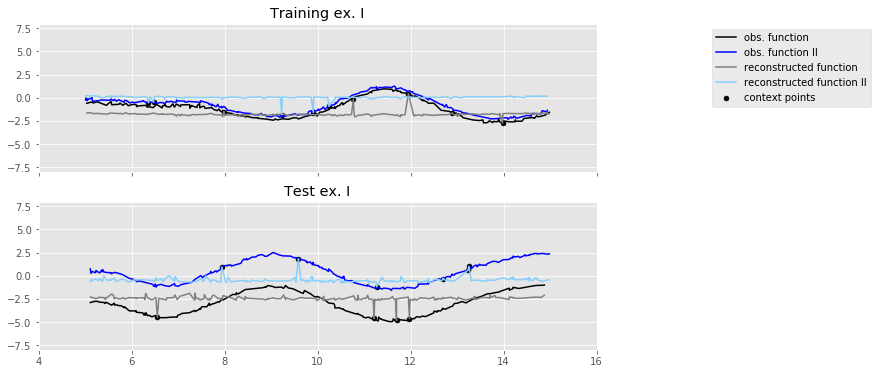

Epoch 0 batch 300 train Loss 0.6276 test Loss 0.6714 with training MSE metric 2.2585 and testing MSE metric 2.6842
learning rate is 0.0003000000142492354
r squared training, series 0: -0.7356029969356475, series 1: -0.6364238344374467
r squared testing, series 0: -1.1714080070111859, series 1: -1.1776492554930371


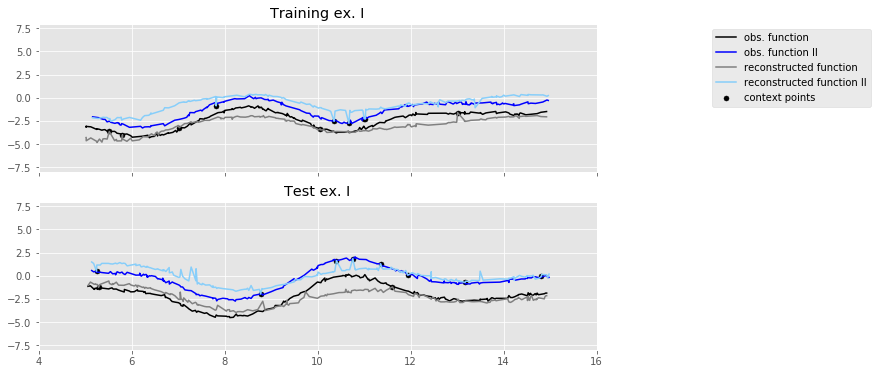

Epoch 0 batch 600 train Loss 0.4740 test Loss 0.4763 with training MSE metric 1.2075 and testing MSE metric 1.2149
learning rate is 0.0003000000142492354
r squared training, series 0: 0.0996696139664538, series 1: 0.10562624561176279
r squared testing, series 0: 0.08916586162791275, series 1: 0.11504025762046724


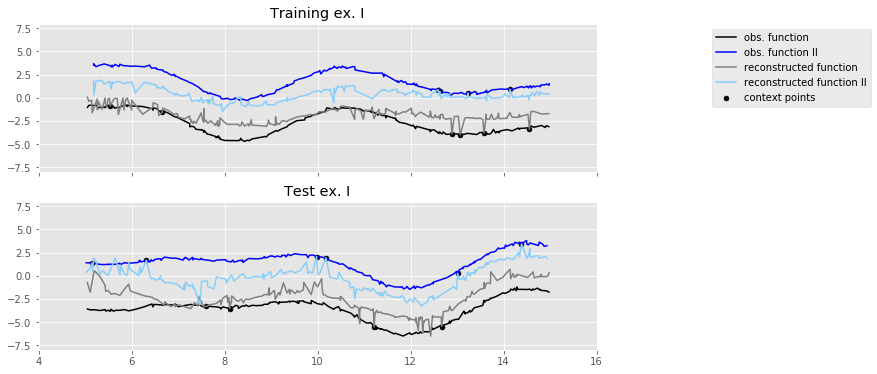

Epoch 0 batch 900 train Loss 0.4714 test Loss 0.4710 with training MSE metric 1.2181 and testing MSE metric 1.2270
learning rate is 0.0003000000142492354
r squared training, series 0: 0.027447644654374784, series 1: 0.08091266503448036
r squared testing, series 0: 0.09462150058154047, series 1: 0.053975382652213556


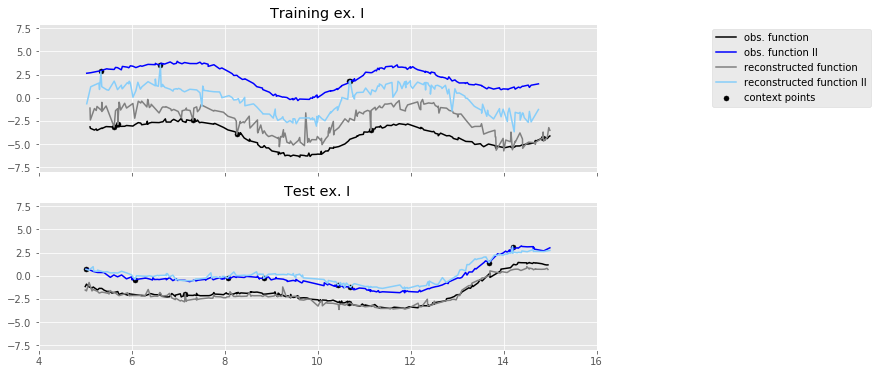

Epoch 0 batch 1200 train Loss 0.4244 test Loss 0.3885 with training MSE metric 1.0076 and testing MSE metric 0.8791
learning rate is 0.0003000000142492354
r squared training, series 0: 0.260538916453301, series 1: 0.2313874965668355
r squared testing, series 0: 0.313301592866598, series 1: 0.2972052517976693


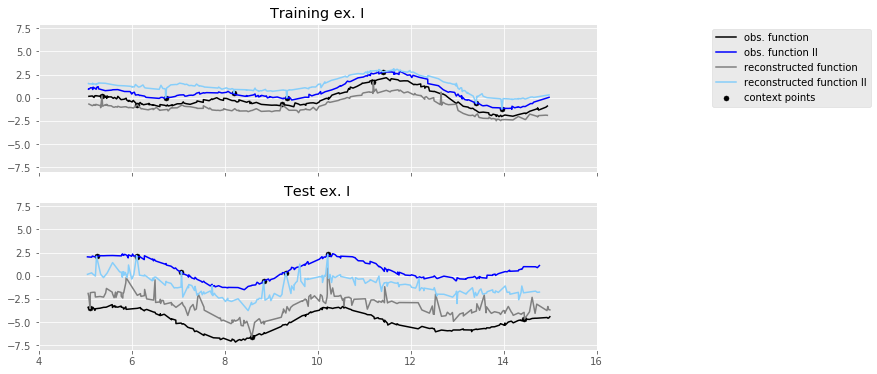

Epoch 0 batch 1500 train Loss 0.3685 test Loss 0.4073 with training MSE metric 0.8426 and testing MSE metric 0.9034
learning rate is 0.0003000000142492354
r squared training, series 0: 0.3265126600072507, series 1: 0.31380415625758135
r squared testing, series 0: 0.3421125443879594, series 1: 0.30552827013112793


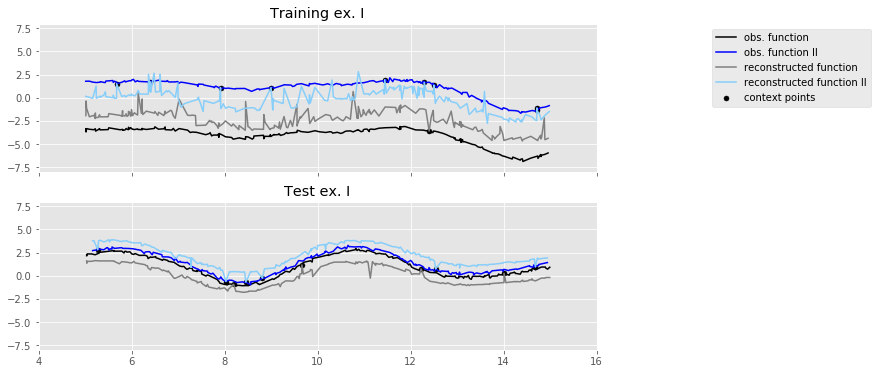

Epoch 0 batch 1800 train Loss 0.4421 test Loss 0.5331 with training MSE metric 0.9827 and testing MSE metric 1.3510
learning rate is 0.0003000000142492354
r squared training, series 0: 0.25329087510304027, series 1: 0.2471239556583617
r squared testing, series 0: 0.021254932607362692, series 1: -0.06855089418590143
Time taken for 1 epoch: 6220.734838008881 secs



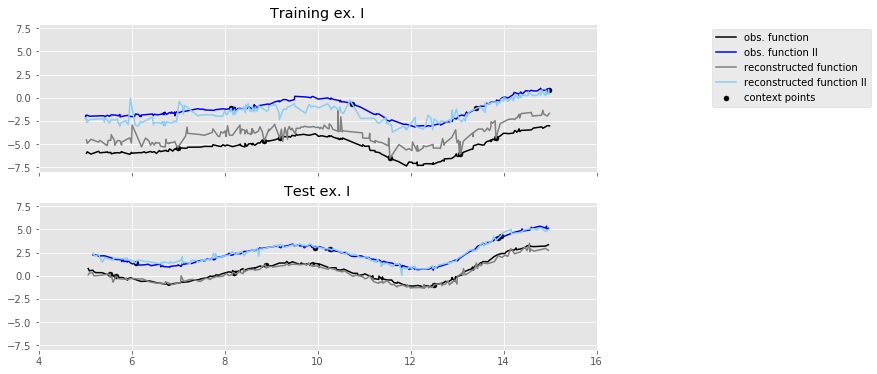

Epoch 1 batch 0 train Loss 0.4162 test Loss 0.4346 with training MSE metric 1.0210 and testing MSE metric 1.0229
learning rate is 0.0003000000142492354
r squared training, series 0: 0.2541218517089817, series 1: 0.1641028615049748
r squared testing, series 0: 0.2464745255223672, series 1: 0.26601113887234556


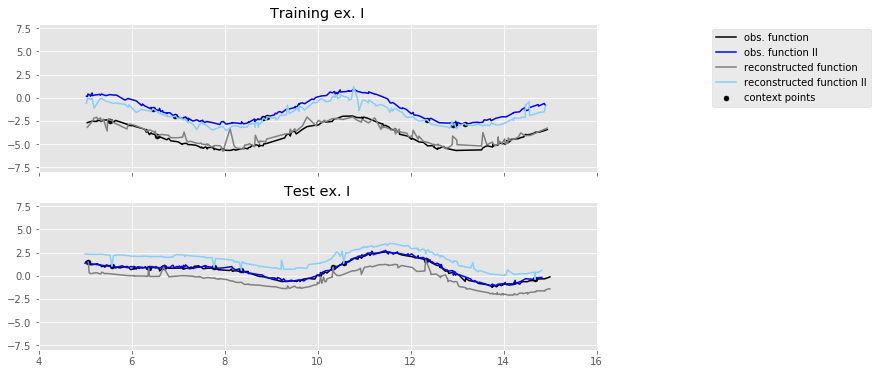

Epoch 1 batch 300 train Loss 0.3943 test Loss 0.4475 with training MSE metric 0.9324 and testing MSE metric 1.1493
learning rate is 0.0003000000142492354
r squared training, series 0: 0.2787093892806326, series 1: 0.27391287580653656
r squared testing, series 0: 0.1506659575806791, series 1: 0.1065222615328904


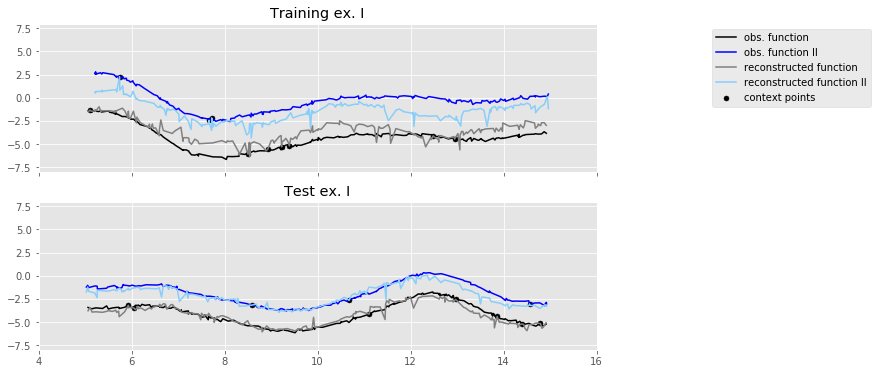

Epoch 1 batch 600 train Loss 0.3702 test Loss 0.4016 with training MSE metric 0.8825 and testing MSE metric 1.0596
learning rate is 0.0003000000142492354
r squared training, series 0: 0.3332609161129487, series 1: 0.33980110786698814
r squared testing, series 0: 0.0728829929169276, series 1: 0.2157837811586013


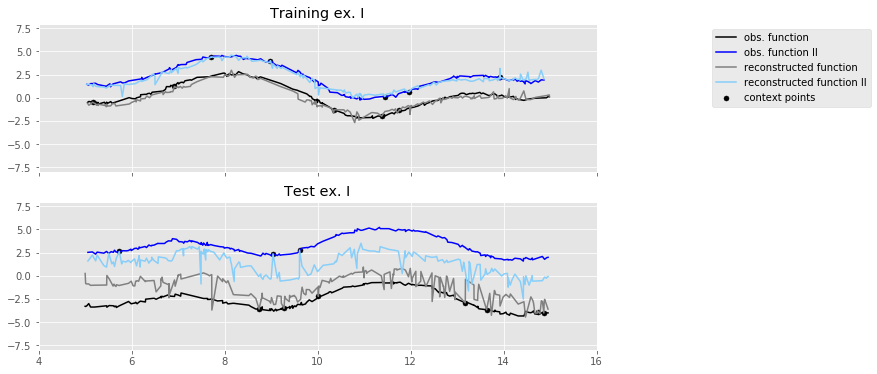

Epoch 1 batch 900 train Loss 0.3859 test Loss 0.4781 with training MSE metric 0.8998 and testing MSE metric 1.2011
learning rate is 0.0003000000142492354
r squared training, series 0: 0.27262171151360687, series 1: 0.3192100452513873
r squared testing, series 0: -0.08305121777499608, series 1: 0.047044983206385754


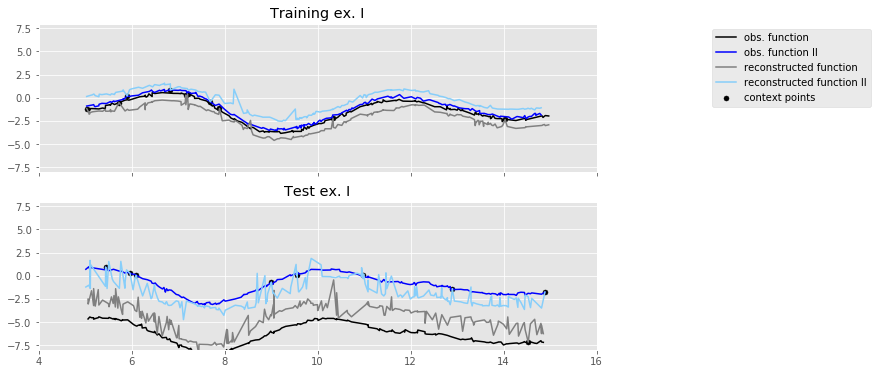

Epoch 1 batch 1200 train Loss 0.3099 test Loss 0.3185 with training MSE metric 0.6561 and testing MSE metric 0.7175
learning rate is 0.0003000000142492354
r squared training, series 0: 0.4923295728382388, series 1: 0.5538992531286508
r squared testing, series 0: 0.46777594805536526, series 1: 0.4952477906575677


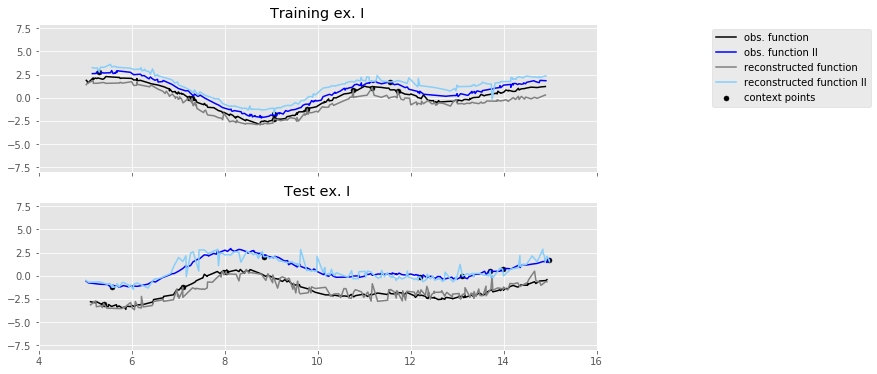

Epoch 1 batch 1500 train Loss 0.2852 test Loss 0.3214 with training MSE metric 0.6291 and testing MSE metric 0.8184
learning rate is 0.0003000000142492354
r squared training, series 0: 0.497966867572457, series 1: 0.5329339260564536
r squared testing, series 0: 0.34098196918725326, series 1: 0.3927930836942223


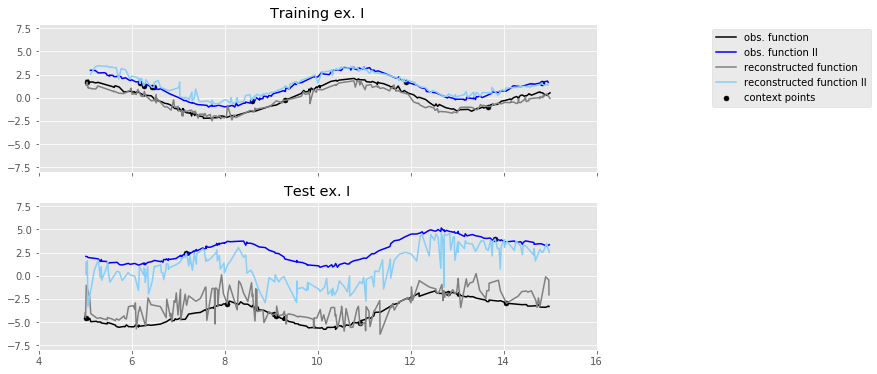

Epoch 1 batch 1800 train Loss 0.2344 test Loss 0.3163 with training MSE metric 0.5051 and testing MSE metric 0.7483
learning rate is 0.0003000000142492354
r squared training, series 0: 0.6265492345103743, series 1: 0.6086949738024625
r squared testing, series 0: 0.38742773277885617, series 1: 0.38508355121750837
Time taken for 1 epoch: 6425.236184120178 secs



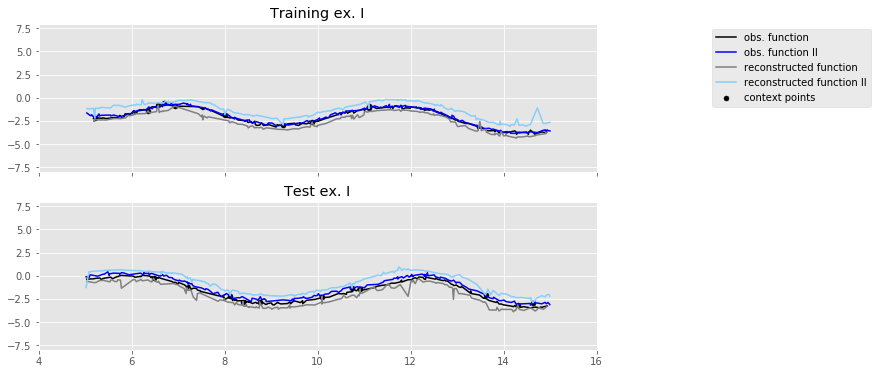

Epoch 2 batch 0 train Loss 0.2802 test Loss 0.2433 with training MSE metric 0.6437 and testing MSE metric 0.5290
learning rate is 0.0003000000142492354
r squared training, series 0: 0.4580765099740937, series 1: 0.518206111932277
r squared testing, series 0: 0.6236568503097327, series 1: 0.615373084940245


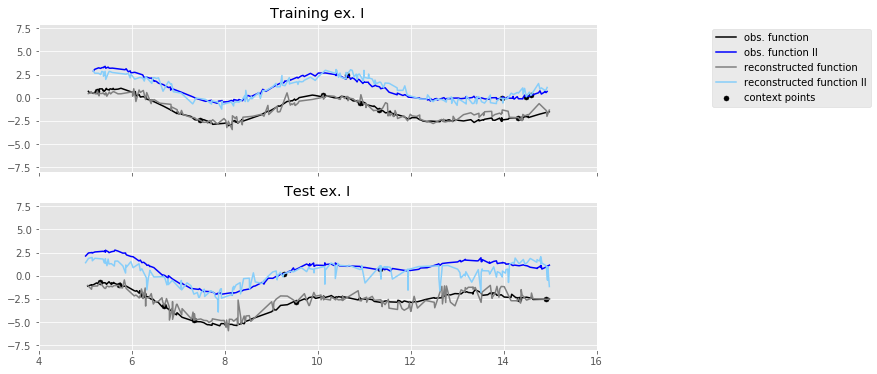

Epoch 2 batch 300 train Loss 0.2173 test Loss 0.1728 with training MSE metric 0.4947 and testing MSE metric 0.3882
learning rate is 0.0003000000142492354
r squared training, series 0: 0.6211123388672828, series 1: 0.6150205254484025
r squared testing, series 0: 0.7400863820631465, series 1: 0.7391580003607654


In [ ]:
if __name__ == '__main__':
    EPOCHS = 75; batch_s  = 64; run = 9999; step = 0; train_steps = 35000; heads = 8; ℯ = 256; context = 10
    l1, _, l2, l3 = [256, 256, 64, 32]
    name_comp = 'run_' + str(run) 
    logdir = save_dir + '/logs/' + name_comp
    writer = tf.summary.create_file_writer(logdir)
    folder = save_dir + '/ckpt/check_' + name_comp
#     lr_fn = tf.optimizers.schedules.PolynomialDecay(9e-3, train_steps, 1e-7, 2)
    optimizer_c = tf.keras.optimizers.Adam(3e-4)
#     ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context,  d = d)
    helpers.mkdir(folder)
    if d:
        decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
    else:
        decoder = experimental_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
    tf.random.set_seed(443)  
    num_batches = int(data[5].shape[0] / batch_s) if d else int(data[4].shape[0] / batch_s)
    ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
    manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
    ckpt.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("Restored from {}".format(manager.latest_checkpoint))
    else:
        print("Initializing from scratch.")
#     optimizer_c = tf.keras.optimizers.Adam(3e-4)
    with writer.as_default():
        for epoch in range(EPOCHS):
            
            start = time.time()

            for batch_n in range(num_batches):
                m_tr.reset_states(); train_loss.reset_states()
                if d:
                    b_data = batch_creator.create_batch(em_x = data[-4], x = data[1], y = data[-3],  em_2 = data[-1], batch_s=64, d=d)
#                     b_data, c = batch_creator.create_batch_2d(em_x = data[-4], x = data[1], y = data[-3],  em_2 = data[-1], batch_s=64)
# #                     print('c: ', c)
#                     if type(c) is list:
#                         cols = [np.arange(c[i], b_data[2].shape[1] -1, 1) for i in range(len(c))]
#                         cc = np.concatenate(cols, axis=0 )
#                         rows = [np.repeat(i, len(m)) for i, m in enumerate(cols)]
#                         r = np.concatenate(rows, axis=0)
#                         to_gather = np.concatenate((r.reshape(-1, 1), cc.reshape(-1,1)), 1)
#                     else:
#                         to_gather = None
#                     pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, b_data[2], b_data[0], d = True, x2 = b_data[3], to_gather=to_gather, context_p = c)
                    pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, b_data[2], b_data[0], d = True, x2 = b_data[3], to_gather=None, context_p = context)
                else:
                    b_data = batch_creator.create_batch(em_x = data[3], x = data[0], y = data[4], batch_s=64, d=d)
                    pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, x = b_data[2], y = b_data[0], context_p = context)
                if (epoch == 0) & (batch_n == 0): helpers.write_speci(folder, names, shapes, context)
                if batch_n % 300 == 0:
                    m_te.reset_states(); test_loss.reset_states()
                    if d:
                        b_data_te = batch_creator.create_batch(em_x = data[3], x = data[2], y = data[6],  em_2 = data[0], batch_s=64, d=d)


#                         b_data_te, c_te = batch_creator.create_batch_2d(em_x = data[3], x = data[2], y = data[6],  em_2 =  data[0], batch_s=64)
#                         if type(c_te) is list:
#                             cols = [np.arange(c_te[i], b_data_te[2].shape[1] -1, 1) for i in range(len(c_te))]
#                             cc = np.concatenate(cols, axis=0 )
#                             rows = [np.repeat(i, len(m)) for i, m in enumerate(cols)]
#                             r = np.concatenate(rows, axis=0)
#                             to_gather_te = np.concatenate((r.reshape(-1, 1), cc.reshape(-1,1)), 1)
#                         else:
#                             to_gather_te = None
                        
                        
#                         pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = b_data_te[2], y_te = b_data_te[0], x2_te = b_data_te[3], to_gather=to_gather_te, context_p = context, d=True)
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, b_data_te[2], b_data_te[0], d = True, x2_te = b_data_te[3], to_gather=None, context_p = context)


                        
#                         idd = np.random.choice(np.arange(0, 64))
#                         seq_l = to_gather[to_gather[:, 0] == idd][0, 1]
#                         plt.scatter(b_data[1][idd, :seq_l], b_data[0][idd, :seq_l] , c = 'blue')
#                         plt.scatter(b_data[1][idd, seq_l:], pred[idd][(seq_l - 1):])
# #                         plt.savefig('foo{}.png'.format((batch_n / num_batches) + (epoch + 1))
#                         plt.show()
                        
                        plotter.follow_training_plot2d(x_tr = b_data[1], y_tr = b_data[0], em_2_tr = b_data[3] , pred = pred, x_te = b_data_te[1], y_te = b_data_te[0], em_2_te = b_data_te[3] ,pred_te = pred_te, num_context = context)
                    else:
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = data[2][:500, :], y_te = data[5][:500, :], context_p = context)
                        plotter.follow_training_plot(x_tr = b_data[1], y_tr = b_data[0], pred = pred, x_te = data[1][:500, :], y_te = data[5][:500, :], pred_te = pred_te, num_context = context)
                    helpers.print_progress(epoch, batch_n, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result())
                    helpers.tf_summaries(run, step, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result(), weights, names)
                    print('learning rate is {}'.format(optimizer_c._decayed_lr('float32').numpy()))
                    if d:
                        m0, m1 = metrics.r_sq_2d(b_data[0][:, 1:], pred.numpy(), b_data[3][:, 1:], context_p = context)
                        m0_te, m1_te = metrics.r_sq_2d(b_data_te[0][:, 1:], pred_te.numpy(), b_data_te[3][:, 1:], context_p = context)
                        print('r squared training, series 0: {}, series 1: {}'.format(m0, m1))
                        print('r squared testing, series 0: {}, series 1: {}'.format(m0_te, m1_te))

#                     else: 
#                         print('r squared training: ', metrics.r_squared(m_tr.result(), b_data[0][:, (context + 1):]))
#                         print('r squared testing: ', metrics.r_squared(m_te.result(), data[5][:500, (context + 1):], batch_s = 500))


                    manager.save()
                step += 1
                ckpt.step.assign_add(1)

            print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

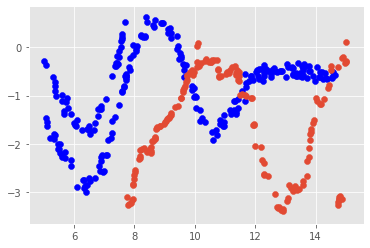

In [8]:
plt.scatter(b_data[1][idd, :seq_l], b_data[0][idd, :seq_l] , c = 'blue')
plt.scatter(b_data[1][idd, seq_l:], pred[idd][(seq_l - 1):])

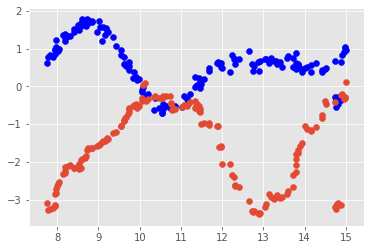

In [9]:
plt.scatter(b_data[1][idd, seq_l:], b_data[0][idd, seq_l:] , c = 'blue')
plt.scatter(b_data[1][idd, seq_l:], pred[idd][(seq_l - 1):])

In [37]:
from tensorboard.plugins import projector
# Save the weights we want to analyse as a variable. Note that the first
# value represents any unknown word, which is not in the metadata, so
# we will remove that value.
subwords = np.concatenate(([0, 1], np.unique(b_data[2])))
with open(os.path.join(logdir, 'metadata.tsv'), "w") as f:
    for subword in subwords:
        f.write("learnt {}\n".format(subword))
    for unknown in np.arange(0, 2000)[~np.isin(range(0, 2000), subwords)]:
        f.write("unknown #{}\n".format(unknown))
weights = tf.Variable(decoder.layers[0].get_weights()[0])
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(logdir, "embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(logdir, config)

In [18]:
from inference import infer

In [19]:
from helpers import masks

In [22]:
decoder.layers

current step:  206
current_position to infer:  5.519972120318995
current target:  -0.017463978064694748
series:  [0.]
current:  [246.]
pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

 [-3.77456067e+00 -5.07607653e-01]], shape=(270, 2), dtype=float64)
sample_y:  -4.43619244634946
current step:  271
current_position to infer:  8.655429257783782
current target:  -2.5619318729089944
series:  [0.]
current:  [277.]
pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302017e-01 -8.74776691e-01]
 [-6.92309577e-01 -8.76096266e-01]
 [-8.89578632e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416180e+00 -7.58831473e-01]
 [-2.79637795e+00 -7.27720175e-01]
 [-2.88624183e+00 -6.72095156e-01]
 [-2.83649132e+00 -6.10774238e-01]
 [-2.85303089e+00 -6.11360165e-01]
 [-2.87022229e+00 -6.44944547e-01]
 [-1.63609828e+00 -3.00315951e-01]
 [-2.81789181e+00 -8.30467582e-01]
 [-2.84105392e+00 -7.78866697e-01]
 [-2.85918204e+00 -7.57343408e-01]
 [-2.86617794e+00 -7.58153969e-01]
 [-1.66799448e+00 -3.36743615e-01]
 [-1.66269328e+00 -5.97911078e-01]
 [-2.86338169e+00 -8.35831293e-01]
 [-2.86508795e+00 -8.25447668e-01]
 [-2.91651097e+00 -7.99379221e-01]
 [-2.53878762e+00 -9.69612356e-01]
 [-2.54495159e+00 -9.66685092e-01]
 [-2.51281192e+00 -9.61268818e-01]
 [-2.52822528e+00 -9.63519455e-01]
 [-2.56884377e+00 -9.37234418e-01]
 [-2.57621547e+00 -9.33112237e-01]
 [-2.58282519e+00 -9.29750964e-01]
 [-2.58305297e+00 -9.30784991e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

 [-7.44694499e-01 -9.57792989e-01]], shape=(342, 2), dtype=float64)
sample_y:  tf.Tensor(-0.7446944986785096, shape=(), dtype=float64)
current step:  343
series:  [0.]
current:  [312.]
pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.612688

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

 [-1.11172477e+00 -7.45779767e-01]], shape=(355, 2), dtype=float64)
sample_y:  tf.Tensor(-1.111724774389833, shape=(), dtype=float64)
current step:  356
series:  [0.]
current:  [319.]
pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.6126883

 [-1.85446989e+00 -6.57581287e-01]], shape=(361, 2), dtype=float64)
sample_y:  tf.Tensor(-1.8544698874942447, shape=(), dtype=float64)
current step:  362
series:  [0.]
current:  [324.]
pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.612688

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

pred:  tf.Tensor(
[[-7.94302031e-01 -8.74776691e-01]
 [-6.92309590e-01 -8.76096266e-01]
 [-8.89578638e-01 -1.01965083e+00]
 [-1.46141880e+00 -1.06245700e+00]
 [-2.80416173e+00 -7.58831459e-01]
 [-2.79637786e+00 -7.27720177e-01]
 [-2.88624178e+00 -6.72095144e-01]
 [-2.83649124e+00 -6.10774230e-01]
 [-2.85303082e+00 -6.11360160e-01]
 [-2.87022227e+00 -6.44944583e-01]
 [-1.63609830e+00 -3.00315947e-01]
 [-2.81789171e+00 -8.30467611e-01]
 [-2.84105382e+00 -7.78866734e-01]
 [-2.85918197e+00 -7.57343413e-01]
 [-2.86617787e+00 -7.58153964e-01]
 [-1.66799449e+00 -3.36743564e-01]
 [-1.66269336e+00 -5.97911108e-01]
 [-2.86338161e+00 -8.35831307e-01]
 [-2.86508785e+00 -8.25447703e-01]
 [-2.91651087e+00 -7.99379251e-01]
 [-2.53878755e+00 -9.69612365e-01]
 [-2.54495152e+00 -9.66685103e-01]
 [-2.51281188e+00 -9.61268839e-01]
 [-2.52822524e+00 -9.63519477e-01]
 [-2.56884372e+00 -9.37234449e-01]
 [-2.57621541e+00 -9.33112272e-01]
 [-2.58282513e+00 -9.29751002e-01]
 [-2.58305291e+00 -9.30785032e-01]
 [

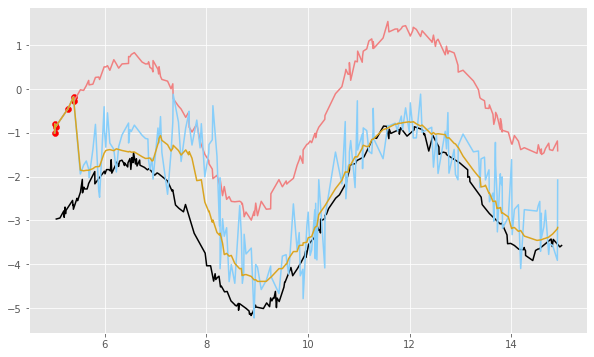

In [43]:
idx = int(np.random.choice(np.arange(0, 30000, 1), 1))
xx, yy, no_s_x1, no_s_y1, x_infer, em, s_y_inf,  n_s_x0_p, n_s_y0_p, n_s_x0, n_s_y0 = plotter.infer_plot2D(decoder, x = data[2][idx, :], y = data[6][idx, :], em = data[3][idx, :], em_2 = data[0][idx, :], samples = 1, num_steps = 999, consec = True, order = True, context_p = 10)

In [10]:
np.array([[1, 2, 3, 4] , [1, 5, 1, 6]]).shape

(2, 4)

In [26]:
tf.reshape(tf.repeat(b_data[0], 256), [64, 400, 256])

<tf.Tensor: shape=(64, 400, 256), dtype=float64, numpy=
array([[[-4.13754431, -4.13754431, -4.13754431, ..., -4.13754431,
         -4.13754431, -4.13754431],
        [-0.60447276, -0.60447276, -0.60447276, ..., -0.60447276,
         -0.60447276, -0.60447276],
        [ 2.56426865,  2.56426865,  2.56426865, ...,  2.56426865,
          2.56426865,  2.56426865],
        ...,
        [-3.30969762, -3.30969762, -3.30969762, ..., -3.30969762,
         -3.30969762, -3.30969762],
        [ 2.48086764,  2.48086764,  2.48086764, ...,  2.48086764,
          2.48086764,  2.48086764],
        [-3.41158581, -3.41158581, -3.41158581, ..., -3.41158581,
         -3.41158581, -3.41158581]],

       [[ 1.69094657,  1.69094657,  1.69094657, ...,  1.69094657,
          1.69094657,  1.69094657],
        [-0.33770907, -0.33770907, -0.33770907, ..., -0.33770907,
         -0.33770907, -0.33770907],
        [ 1.09868354,  1.09868354,  1.09868354, ...,  1.09868354,
          1.09868354,  1.09868354],
        ...

In [14]:
a = tf.tile(b_data[0])

In [15]:
a.numpy().reshape(2, -1)

array([[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 5, 1, 6, 1, 5, 1, 6, 1, 5,
        1, 6],
       [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 5, 1, 6, 1, 5, 1, 6, 1, 5,
        1, 6]])

In [11]:
import glob
from PIL import Image

# filepaths
fp_in = image_folder = '/Users/omernivron/Downloads/attention_plots/*.png'
fp_out = "/Users/omernivron/Downloads/image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=700, loop=0)

